In [318]:
import csv
import requests
from bs4 import BeautifulSoup

## Collect 1000 movies

In [322]:
URL = "https://www.imdb.com/search/title/?groups=top_1000&start=" #1 "&ref_=adv_nxt"

start_number = 1

filecsv = open('movies1.csv', 'w', encoding='utf8')
csv_columns = ['Name', 'Date' ,'Certificate', 'Duration', 'Votes', 'IMDB', 'Metascore', 'Director', 
               'Star1', 'Star2', 'Star3', 'Star4', 'Summary', 'Genre']
writer = csv.DictWriter(filecsv, fieldnames=csv_columns)
writer.writeheader()

# there are 20 pages, each containing 50 movies
for start in range(1,1001,50): #1000
    print(start)
    try:
        r = requests.get(URL + str(start) + "&ref_=adv_nxt")
    except requests.exceptions.ConnectionError:
        r.status_code = "Connection refused"
    
    
    soup = BeautifulSoup(r.content, "html.parser") # first argument is the html content that needs to be parsed 
                                                   # and the second argumnent is the html parser that will be used
    
    ancher = soup.find_all('div', {'class':'lister-item mode-advanced'}) 
    for mv in ancher:
        name = mv.find('h3', {'class':'lister-item-header'}).find('a').text
        year = mv.find('span', {'class':'lister-item-year text-muted unbold'}).text
        year = year.strip('(')[0:4]
        certif = mv.find('span', {'class':'certificate'})
#         print(certif)
        if certif:
            certificate = certif.text
        else:
            certificate = 'NULL'
        runtime = mv.find('span', {'class':'runtime'}).text.split()[0]
        genre = mv.find('span', {'class':'genre'}).text.split(',')[0].split('\n')[1]
        #imdb = mv.find('span', {'calss':''})
        imdb_ = mv.find('strong')
        if imdb_:
            imdb = imdb_.text
        else:
            imdb = 'NULL'
            
        meta_ = mv.find('div', {'class':'inline-block ratings-metascore'})
        if meta_:
            metascore = meta_.text.split('\n')[1].split()[0]
        else:
            metascore = 'NULL'
            
        vote = mv.find('span', {'name':'nv'})
        if vote:
            votes = vote.text
        else:
            votes = 'NULL'
            
        prsn = mv.find('p', {'class':''}).find_all('a')
        for i in range(0,len(prsn)):
            if i == 0:
                director = prsn[i].text
            else:
                star = 'star' + str(i)
                if prsn[i]:
                    locals()[star] = prsn[i].text
                else:
                    locals()[star] = 'NULL'
        summ = mv.find_all('p', {'class':'text-muted'})[1].text

        writer.writerow({'Name':name, 'Date':year ,'Certificate':certificate, 'Duration':runtime, 'Votes':votes, 
                         'IMDB':imdb, 'Metascore':metascore, 'Director':director, 
                         'Star1':star1, 'Star2':star2, 'Star3':star3, 'Star4':star4, 'Summary':summ, 'Genre':genre})

1
51
101
151
201
251
301
351
401
451
501
551
601
651
701
751
801
851
901
951


In [353]:
df1 = pd.read_csv('movies1.csv')
df1['Summary'] = df1['Summary'].str.strip()
df1

,Name,Date,Certificate,Duration,Votes,IMDB,Metascore,Director,Star1,Star2,Star3,Star4,Summary,Genre
0,Avatar: The Way of Water,2022,PG-13,192,"248,978",7.9,67.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Jake Sully lives with his newfound family form...,Action
1,The Banshees of Inisherin,2022,R,114,"91,268",7.8,87.0,Martin McDonagh,Colin Farrell,Brendan Gleeson,Kerry Condon,Barry Keoghan,Two lifelong friends find themselves at an imp...,Comedy
2,Puss in Boots: The Last Wish,2022,PG,102,"41,592",7.8,75.0,Joel Crawford,Januel Mercado,Antonio Banderas,Salma Hayek,Harvey Guillén,When Puss in Boots discovers that his passion ...,Animation
3,Everything Everywhere All at Once,2022,R,139,"291,967",8.0,81.0,Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,A middle-aged Chinese immigrant is swept up in...,Action
4,The Fabelmans,2022,PG-13,151,"35,269",7.7,84.0,Steven Spielberg,Michelle Williams,Gabriel LaBelle,Paul Dano,Judd Hirsch,"Growing up in post-World War II era Arizona, y...",Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,Padman,2018,PG-13,140,"26,757",7.9,NaN,R. Balki,Akshay Kumar,Radhika Apte,Sonam Kapoor,Jyoti Subhash,Upon realizing the extent to which women are a...,Biography
989,Vizontele,2001,NaN,110,"37,190",8.0,NaN,Yilmaz Erdogan,Ömer Faruk Sorak,Yilmaz Erdogan,Demet Akbag,Altan Erkekli,"Lives of residents in a small, Anatolian villa...",Comedy
990,Kahaani,2012,NaN,122,"63,464",8.1,NaN,Sujoy Ghosh,Vidya Balan,Parambrata Chattopadhyay,Indraneil Sengupta,Nawazuddin Siddiqui,A pregnant woman's search for her missing husb...,Mystery
991,Udaan,2010,NaN,134,"45,476",8.1,NaN,Vikramaditya Motwane,Rajat Barmecha,Ronit Roy,Manjot Singh,Ram Kapoor,"Expelled from his school, a 16-year old boy re...",Drama


In [330]:
print("#null values in df1:\n", df1.isna().sum(axis=0))

#null values in df1:
 Name             0
Date             0
Certificate    443
Duration         0
Votes            0
IMDB             0
Metascore      153
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Summary          0
Genre            0
dtype: int64


## Read data

In [354]:
import pandas as pd
# data extracted with beautiful soap
df = pd.read_csv("movies3.csv")
# data extracted with selenium
df2 = pd.read_csv("movies2.csv")
df.head(20)

,Name,Date,Certificate,Duration,Votes,IMDB,Metascore,Director,Star1,Star2,Star3,Star4,Genre
0,Avatar: The Way of Water,2022,PG-13,192,"181,876",7.9,67.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Action
1,Knives Out,2019,PG-13,130,"663,687",7.9,82.0,Rian Johnson,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,Comedy
2,Avatar,2009,PG-13,162,"1,289,325",7.9,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,Action
3,The Banshees of Inisherin,2022,R,114,"60,799",7.9,87.0,Martin McDonagh,Colin Farrell,Brendan Gleeson,Kerry Condon,Pat Shortt,Comedy
4,A Christmas Story,1983,NaN,93,"159,045",7.9,77.0,Bob Clark,Peter Billingsley,Melinda Dillon,Darren McGavin,Scott Schwartz,Comedy
5,Top Gun: Maverick,2022,PG-13,130,"476,830",8.4,78.0,Joseph Kosinski,Tom Cruise,Jennifer Connelly,Miles Teller,Val Kilmer,Action
6,Home Alone,1990,NaN,103,"589,974",7.7,63.0,Chris Columbus,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,Comedy
7,It's a Wonderful Life,1946,PG,130,"463,369",8.6,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,Drama
8,Guillermo del Toro's Pinocchio,2022,PG,117,"56,376",7.7,79.0,Guillermo del Toro,Mark Gustafson,Ewan McGregor,David Bradley,Gregory Mann,Animation
9,Everything Everywhere All at Once,2022,R,139,"270,394",8.1,81.0,Dan Kwan,Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,Action


## Data cleaning

In [355]:
print("#null values in df1:\n", df.isna().sum(axis=0))

#null values in df1:
 Name             0
Date             0
Certificate    450
Duration         0
Votes            0
IMDB             0
Metascore      160
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Genre            0
dtype: int64


In [356]:
df['Certificate'].unique()

array(['PG-13', 'R', nan, 'PG', 'G', '18+', '(Banned)', 'NC-17',
       'Approved', 'M/PG'], dtype=object)

In [357]:
# wrong values collected from the website
list1 = ['148 min','163 min','175 min', '157 min', '152 min', '109 min', '128 min']

In [358]:
# change values of certificate in first dataset with corresponding values from the second dataset
for index, row in df2.iterrows():
    if (row['certificate'] not in list1):
        df.loc[df['Name'] == row['title'], 'Certificate'] = row['certificate']

In [359]:
df['Certificate'] =df['Certificate'].replace(['Unrated','6','12','18','16','(Banned)'], 
                                             ['Not Rated','6+','12+','18+','16+','Banned'])

In [360]:
df['Certificate'].unique()

array(['PG-13', 'R', 'PG', 'G', nan, 'Not Rated', 'Approved', 'Passed',
       'NC-17', 'TV-MA', 'GP', '18+', 'TV-PG', 'TV-14', 'M/PG', '12+',
       'Banned', '16+', '6+'], dtype=object)

In [361]:
print("#null values in df1:\n", df.isna().sum(axis=0))

#null values in df1:
 Name             0
Date             0
Certificate    125
Duration         0
Votes            0
IMDB             0
Metascore      160
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Genre            0
dtype: int64


### Fill null values of metascore

In [362]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

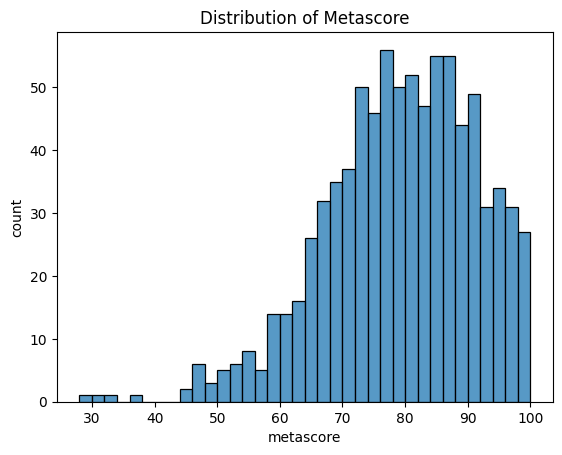

In [363]:
ax = sns.histplot(x = df['Metascore'], binwidth=2)
ax.set(xlabel='metascore', ylabel='count', title='Distribution of Metascore')
plt.show()

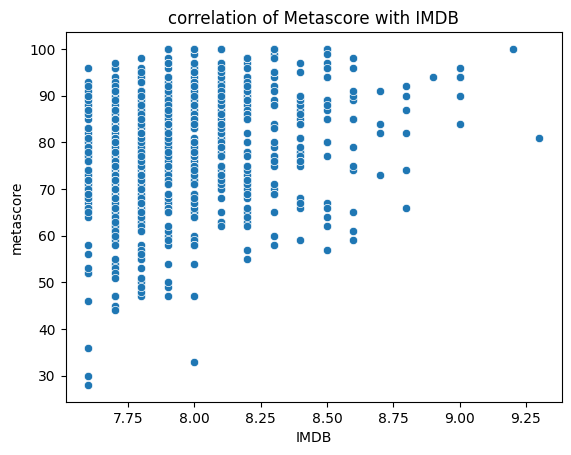

In [364]:
ax = sns.scatterplot(x=df['IMDB'], y=df['Metascore'])
ax.set(xlabel='IMDB', ylabel='metascore', title='correlation of Metascore with IMDB');

In [365]:
print('mean: ', df['Metascore'].mean())
print('median: ', df['Metascore'].median())
print('mode: ', df['Metascore'].mode())

mean:  78.80595238095238
median:  80.0
mode:  0    86.0
Name: Metascore, dtype: float64


In [366]:
#fill null values of Metascore with median
df['Metascore'].fillna((df['Metascore'].median()), inplace=True)

In [367]:
print("#null values in df1:\n", df.isna().sum(axis=0))

#null values in df1:
 Name             0
Date             0
Certificate    125
Duration         0
Votes            0
IMDB             0
Metascore        0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Genre            0
dtype: int64


### Fill null values of certificate

In [368]:
df['Genre'].unique()

array(['Action', 'Comedy', 'Drama', 'Animation', 'Adventure', 'Crime',
       'Drama            ', 'Biography', 'Horror', 'Mystery', 'Family',
       'Comedy            ', 'Western            ', 'Horror            ',
       'Film-Noir', 'Fantasy', 'Thriller            '], dtype=object)

In [369]:
# delete extra white spaces from genres
df['Genre'] = df['Genre'].str.strip()

In [370]:
df['Genre'].unique()

array(['Action', 'Comedy', 'Drama', 'Animation', 'Adventure', 'Crime',
       'Biography', 'Horror', 'Mystery', 'Family', 'Western', 'Film-Noir',
       'Fantasy', 'Thriller'], dtype=object)

In [371]:
# most repeated certificate of each genre
df.groupby('Genre')['Certificate'].agg(pd.Series.mode)

Genre
Action                            R
Adventure                        PG
Animation                        PG
Biography                         R
Comedy                            R
Crime                             R
Drama                             R
Family                            G
Fantasy              [Not Rated, R]
Film-Noir        [Approved, Passed]
Horror                            R
Mystery                     [PG, R]
Thriller                  Not Rated
Western      [PG, PG-13, Passed, R]
Name: Certificate, dtype: object

In [372]:
df['Certificate'].value_counts()

R            352
PG-13        165
PG           135
Not Rated     98
Passed        45
G             33
Approved      28
TV-MA          4
GP             3
NC-17          2
TV-PG          2
TV-14          2
18+            1
M/PG           1
12+            1
Banned         1
16+            1
6+             1
Name: Certificate, dtype: int64

R – Restricted
Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.

In [373]:
df['Certificate'] = df['Certificate'].fillna('R')

In [374]:
print("#null values in df1:\n", df.isna().sum(axis=0))

#null values in df1:
 Name           0
Date           0
Certificate    0
Duration       0
Votes          0
IMDB           0
Metascore      0
Director       0
Star1          0
Star2          0
Star3          0
Star4          0
Genre          0
dtype: int64


In [375]:
df['Certificate'].value_counts()

R            477
PG-13        165
PG           135
Not Rated     98
Passed        45
G             33
Approved      28
TV-MA          4
GP             3
NC-17          2
TV-PG          2
TV-14          2
18+            1
M/PG           1
12+            1
Banned         1
16+            1
6+             1
Name: Certificate, dtype: int64

### Duplicate values

In [383]:
df.duplicated().sum()

0

### Column type

In [376]:
df.dtypes

Name            object
Date             int64
Certificate     object
Duration         int64
Votes           object
IMDB           float64
Metascore      float64
Director        object
Star1           object
Star2           object
Star3           object
Star4           object
Genre           object
dtype: object

In [377]:
df['Votes'] = df['Votes'].apply(lambda x: x.replace(',',''))
df = df.astype({'Date':'int16', 'Certificate': 'category', 'Votes': 'int64','IMDB':'float16', 
                'Metascore':'float16', 'Genre':'category'})

In [378]:
df.dtypes

Name             object
Date              int16
Certificate    category
Duration          int64
Votes             int64
IMDB            float16
Metascore       float16
Director         object
Star1            object
Star2            object
Star3            object
Star4            object
Genre          category
dtype: object

### Balancing Classes

In [379]:
df['Genre'].value_counts()

Drama        287
Action       183
Comedy       151
Crime        111
Biography     87
Animation     84
Adventure     65
Horror        13
Mystery        9
Western        4
Fantasy        2
Film-Noir      2
Family         1
Thriller       1
Name: Genre, dtype: int64

In [380]:
# joining the least repeated genres to a new class of others
df = df.replace(dict.fromkeys(['Horror','Mystery','Western','Fantasy','Film-Noir','Family','Thriller'], 'Other'))

In [381]:
df['Genre'].value_counts()

Drama        287
Action       183
Comedy       151
Crime        111
Biography     87
Animation     84
Adventure     65
Other         32
Name: Genre, dtype: int64

In [382]:
# save the cleaned dataset for later use
df.to_csv('movies.csv', encoding='utf-8')

In [384]:
# joining summary of movies to the cleaned sataset
df1 = df1[['Name', 'Summary']]

df = pd.merge(df, df1, how='inner', on = 'Name')

In [386]:
# saving new dataset(including the summaries)
df.to_csv('movies5.csv')